In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mocalum as mc
import xarray as xr
import time

In [2]:
# single wind config MC setup
koshava_xyz = [0, 0, 0]
no_scans = 10000
# wind field setup
ref_height = 100      # power law reference height
meas_height = 100 
shear_exponent = 0.2  # power law shear exponent
wind_speed = 10       # wind speed at referenec height
wind_dir = 180        # wind direction
w = 0

# beam steering setup
distance = 1000   # meter
elevation = np.degrees(np.arcsin(meas_height / distance))
angular_res = 1   # degree
azimuth_mid = 90   # central azimuth angle
sector_size = 30  # degree
scan_speed = 1    # degree.s^-1
max_speed = 50    # degree.s^-1
max_acc = 100     # degree.s^-2

# Uncertainty terms
no_sim = 10000 # number of simulations
corr_coef = 0   # correlation coefficient
mu = 0         # we assume no systematic uncertainty
azim_std = 0.1 # degrees
elev_std = 0.1 # degrees
dis_std = 10   # meters
rad_std = 0.1  # m.s-1

In [3]:
tmp = mc.Mocalum()
tmp.x_res = tmp.y_res = 10

In [4]:
for sectrsz in range(10,100,10):
    tmp.set_ivap_probing(koshava_xyz, sectrsz, azimuth_mid, angular_res, elevation, distance, 
                        no_scans, scan_speed, max_speed,max_acc)

    tmp.gen_unc_contributors(corr_coef)
    tmp.gen_plaw_ffield(wind_speed, 90, w, ref_height, shear_exponent)
    tmp.calc_los_speed()
    tmp.reconstruct_wind()
    print(tmp.data.rc_wind.ws.std().values)

0.04108178989627296
0.02418835177910149
0.01966984639086382
0.017221332057256
0.015395454613397556
0.014429891581224963
0.013677977702596829
0.01286404545773255
0.012345404246856866


In [5]:
tmp.data.ffield_bbox_cfg

{'x': {'min': 676.4425458585671, 'max': 1041.7372476408038, 'res': 10},
 'y': {'min': -733.4296671150438, 'max': 733.3291125265, 'res': 10},
 'z': {'min': 90.2225605412307, 'max': 110.526268646544, 'res': 1},
 'time_steps': array([0.000000e+00, 1.000000e+00, 2.000000e+00, ..., 9.229957e+05,
        9.229967e+05, 9.229977e+05])}

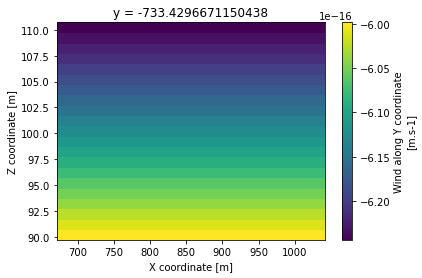

In [6]:
tmp.data.ffield.v.isel(y=0).plot()
